In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from scipy.stats.mstats import winsorize


# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Telco-Customer-Churn.csv')

In [ ]:
dataset.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isnull().sum()*100/dataset.isnull().count()


customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [ ]:
dataset.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset['MonthlyCharges']=round(dataset['MonthlyCharges'])


In [ ]:
dataset.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Outliers

In [ ]:
cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for col in cols:
  dataset=pd.get_dummies(dataset, columns=[col], drop_first=True)


# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
dataset["Churn_numerical"] = dataset["Churn"].apply(lambda x: target_map[x])

In [ ]:
dataset.columns


Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_numerical'],
      dtype='object')

In [ ]:
dataset.customerID.sort_values()


2307    0002-ORFBO
3488    0003-MKNFE
3845    0004-TLHLJ
5931    0011-IGKFF
5569    0013-EXCHZ
           ...    
3607    9987-LUTYD
2875    9992-RRAMN
1260    9992-UJOEL
1996    9993-LHIEB
1634    9995-HOTOH
Name: customerID, Length: 7043, dtype: object

In [ ]:
dataset = dataset.drop(['TotalCharges'], axis=1)
dataset = dataset.drop(['Churn'], axis=1)
dataset = dataset.drop(['customerID'], axis=1)

# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the
# value of the ninetieth percentile.
dataset["winsorized_tenure"] = winsorize(dataset["tenure"], (0, 0.20))
dataset["winsorized_MonthlyCharges"] = winsorize(dataset["MonthlyCharges"], (0, 0.20))


In [ ]:
dataset = dataset.drop(['tenure'], axis=1)
dataset = dataset.drop(['MonthlyCharges'], axis=1)


In [ ]:
dataset.columns


Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_numerical', 'winsorized_tenure', 'winsorized_MonthlyCharges'],
      dtype='object')

In [ ]:
dataset.describe()


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_numerical,winsorized_tenure,winsorized_MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,0.439585,0.216669,0.216669,...,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370,30.750958,62.928156
std,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,0.496372,0.412004,0.412004,...,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561,22.254349,27.764758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,70.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,55.000000,90.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,94.000000


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            7043 non-null   uint8  
 1   SeniorCitizen_1                        7043 non-null   uint8  
 2   Partner_Yes                            7043 non-null   uint8  
 3   Dependents_Yes                         7043 non-null   uint8  
 4   PhoneService_Yes                       7043 non-null   uint8  
 5   MultipleLines_No phone service         7043 non-null   uint8  
 6   MultipleLines_Yes                      7043 non-null   uint8  
 7   InternetService_Fiber optic            7043 non-null   uint8  
 8   InternetService_No                     7043 non-null   uint8  
 9   OnlineSecurity_No internet service     7043 non-null   uint8  
 10  OnlineSecurity_Yes                     7043 non-null   uint8  
 11  Onli

In [ ]:
# Create List of Numeric Columns
numeric_columns = dataset.select_dtypes(['int64', 'float64','uint8']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_numerical', 'winsorized_tenure', 'winsorized_MonthlyCharges'],
      dtype='object')
The number of numerical columns is 30


In [ ]:
outlier_cols=[]
for col in numeric_columns:
      q75, q25 = np.percentile(dataset[col], [75 ,25])
      iqr = q75 - q25


      min_val = q25 - (iqr*1.5)
      max_val = q75 + (iqr*1.5)

      print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((dataset[col] > max_val)
                        | (dataset[col] < min_val))[0])), len((np.where((dataset[col] > max_val) |
                                                      (dataset[col] < min_val))[0]))*100/1987))


      if len((np.where((dataset[col] > max_val) | (dataset[col] < min_val))[0])) > 0:
        outlier_cols.append(col)

print(outlier_cols)


Number of outliers for gender_Male is: 0 and it is 0.0 percent.
Number of outliers for SeniorCitizen_1 is: 1142 and it is 57.47357825868143 percent.
Number of outliers for Partner_Yes is: 0 and it is 0.0 percent.
Number of outliers for Dependents_Yes is: 0 and it is 0.0 percent.
Number of outliers for PhoneService_Yes is: 682 and it is 34.32310015098138 percent.
Number of outliers for MultipleLines_No phone service is: 682 and it is 34.32310015098138 percent.
Number of outliers for MultipleLines_Yes is: 0 and it is 0.0 percent.
Number of outliers for InternetService_Fiber optic is: 0 and it is 0.0 percent.
Number of outliers for InternetService_No is: 1526 and it is 76.79919476597887 percent.
Number of outliers for OnlineSecurity_No internet service is: 1526 and it is 76.79919476597887 percent.
Number of outliers for OnlineSecurity_Yes is: 0 and it is 0.0 percent.
Number of outliers for OnlineBackup_No internet service is: 1526 and it is 76.79919476597887 percent.
Number of outliers fo

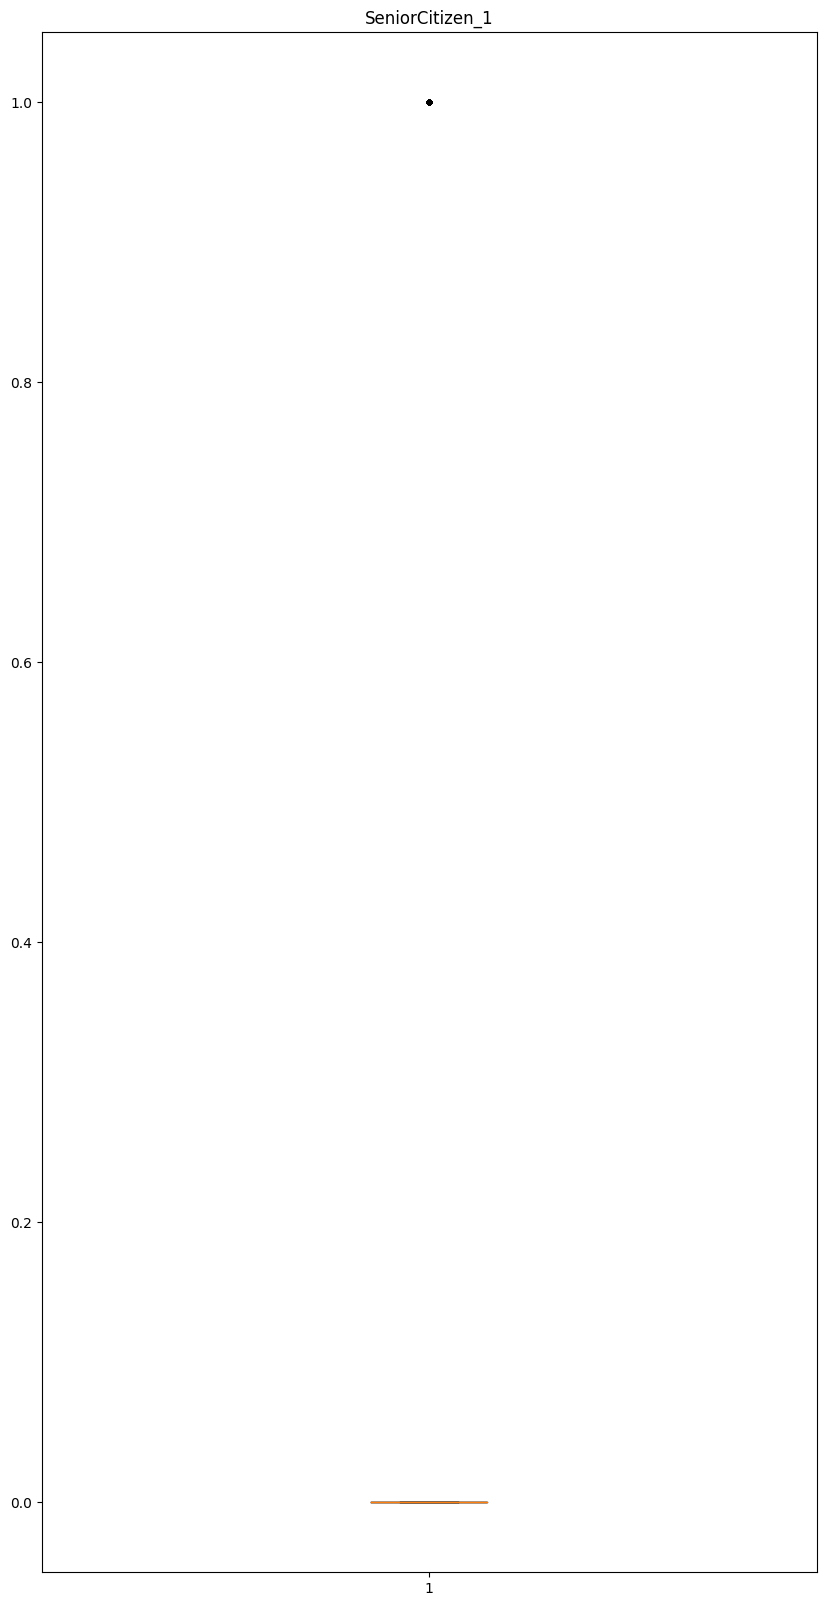

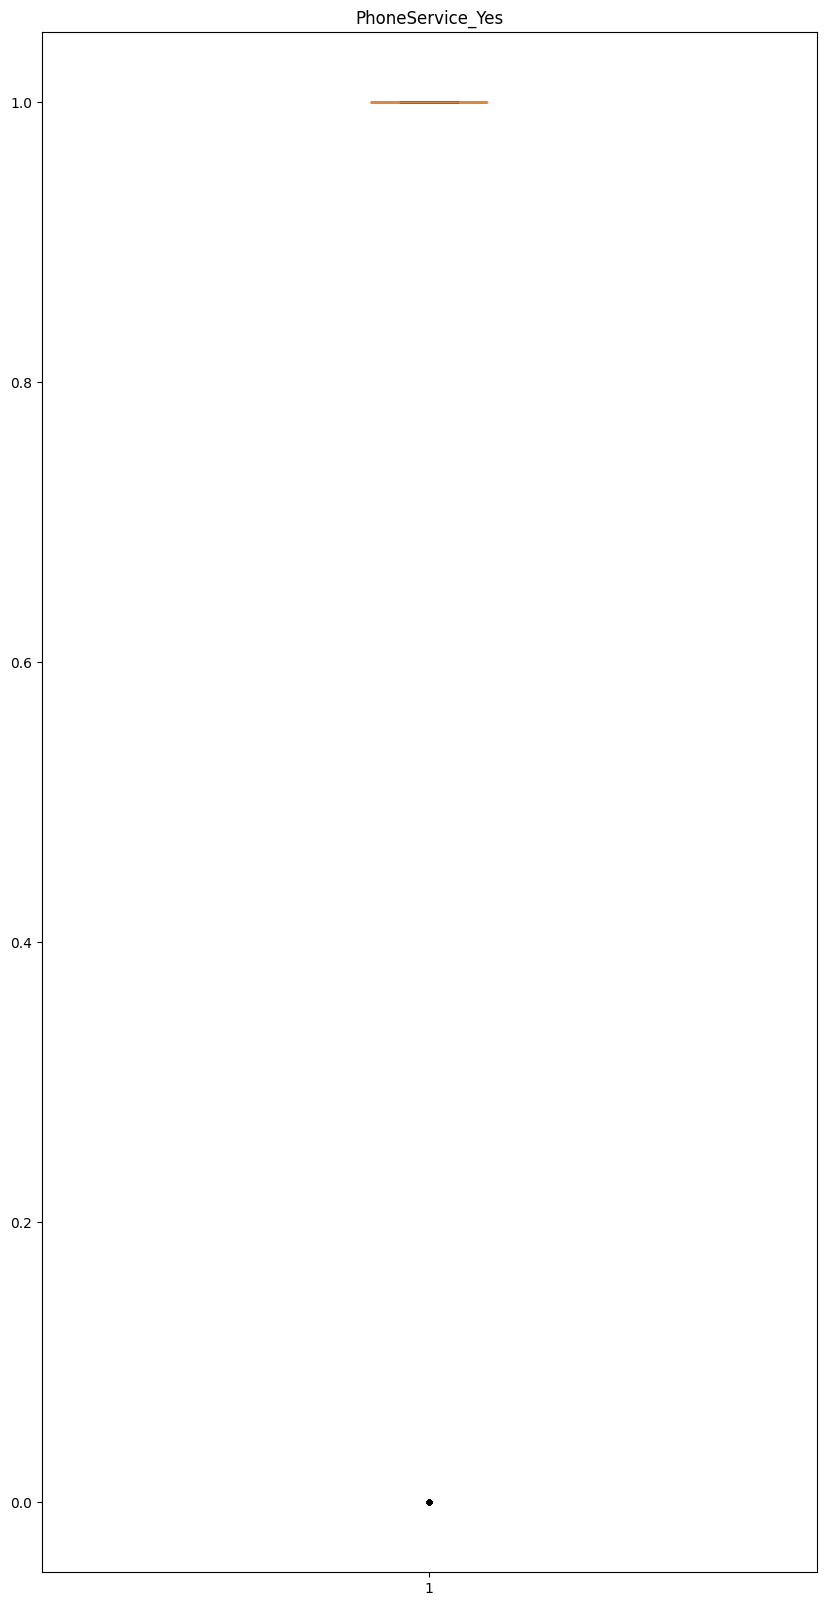

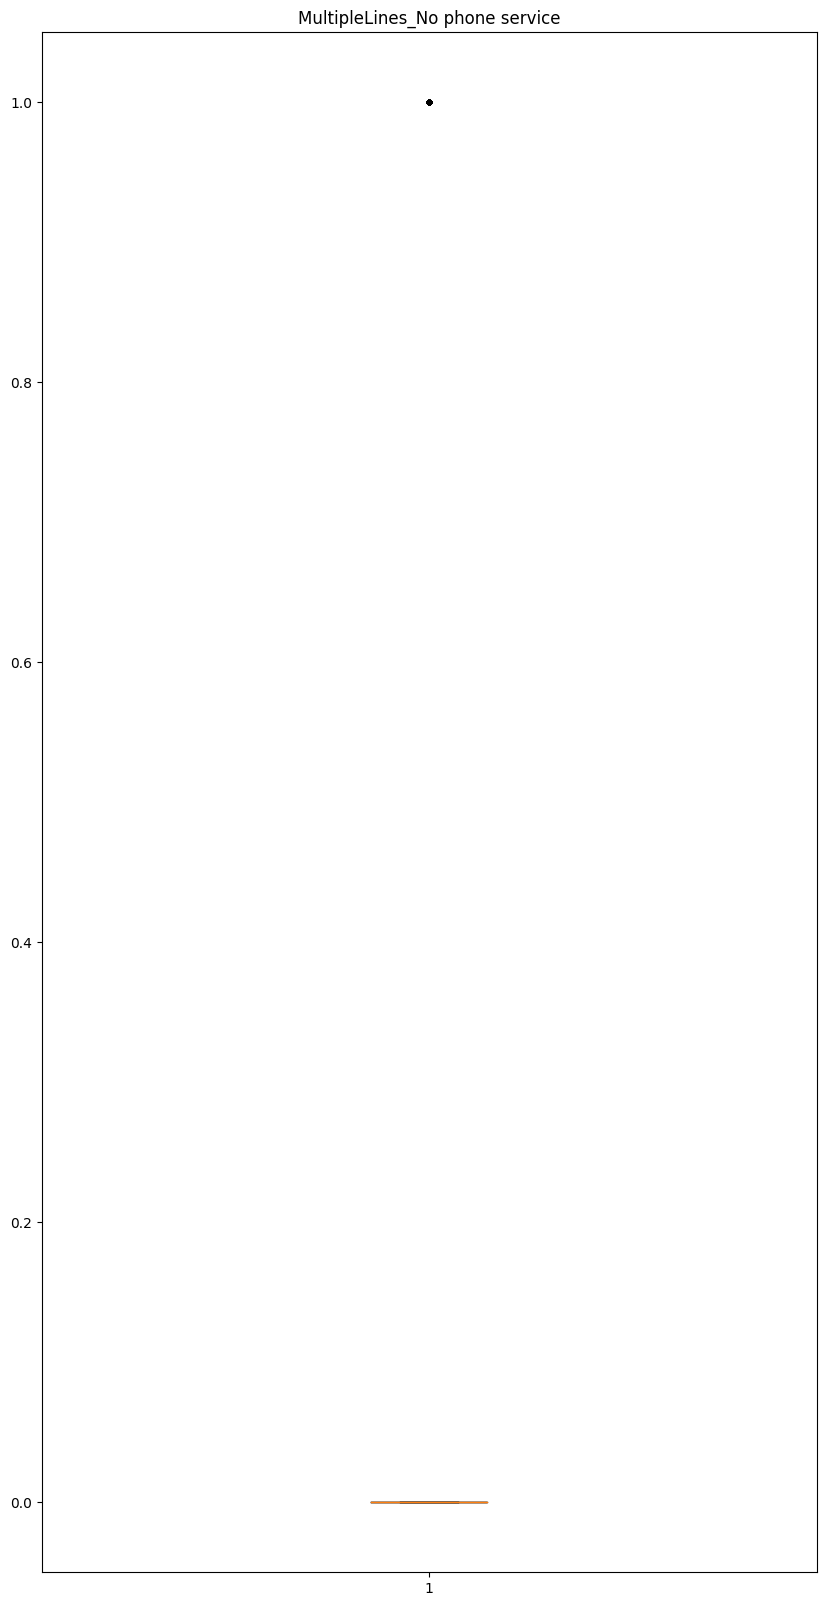

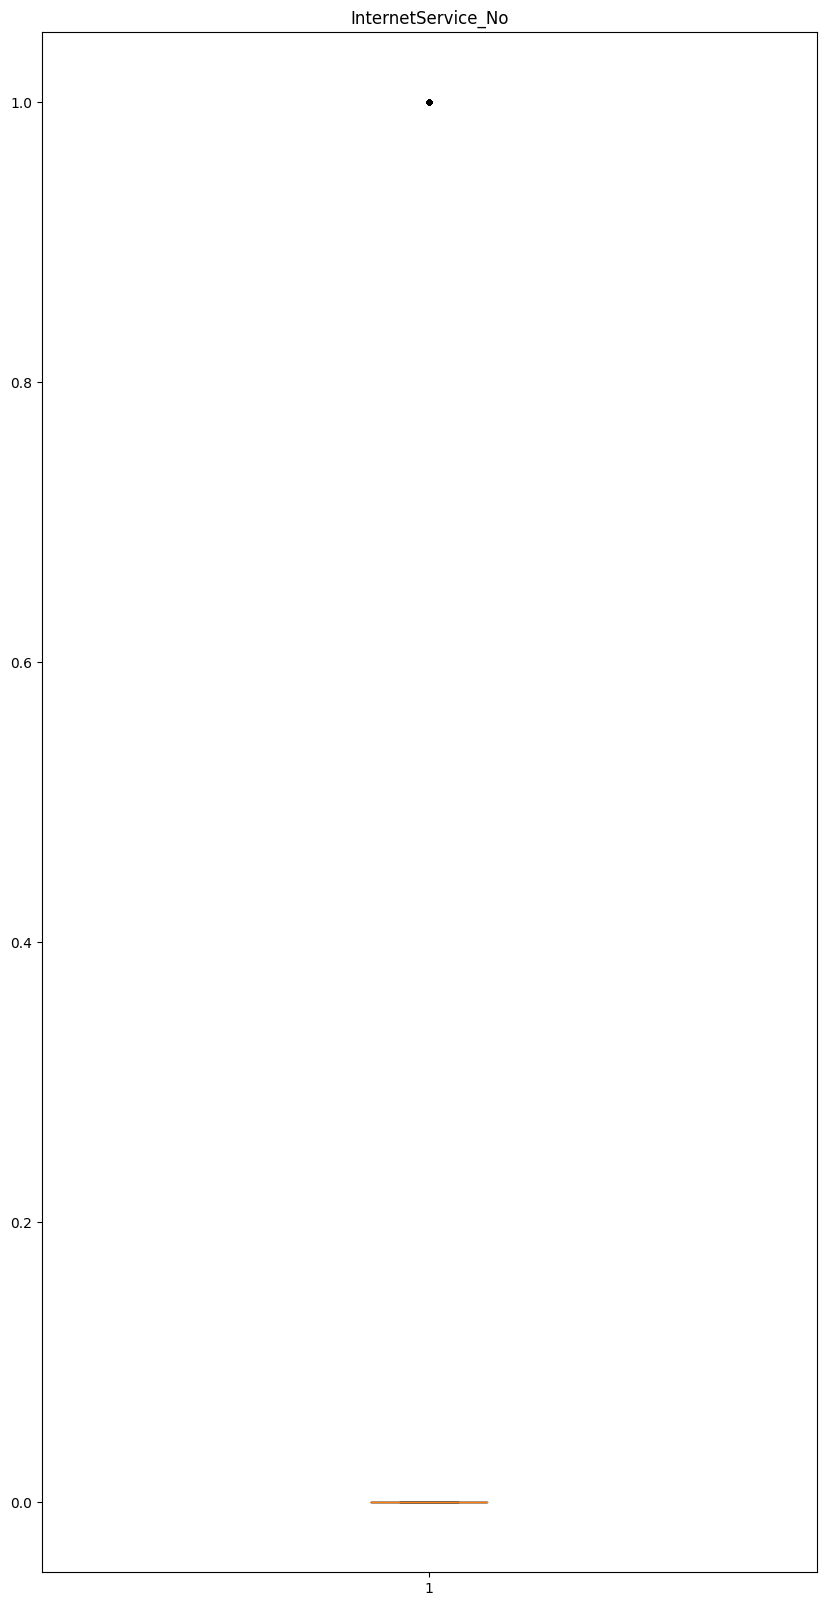

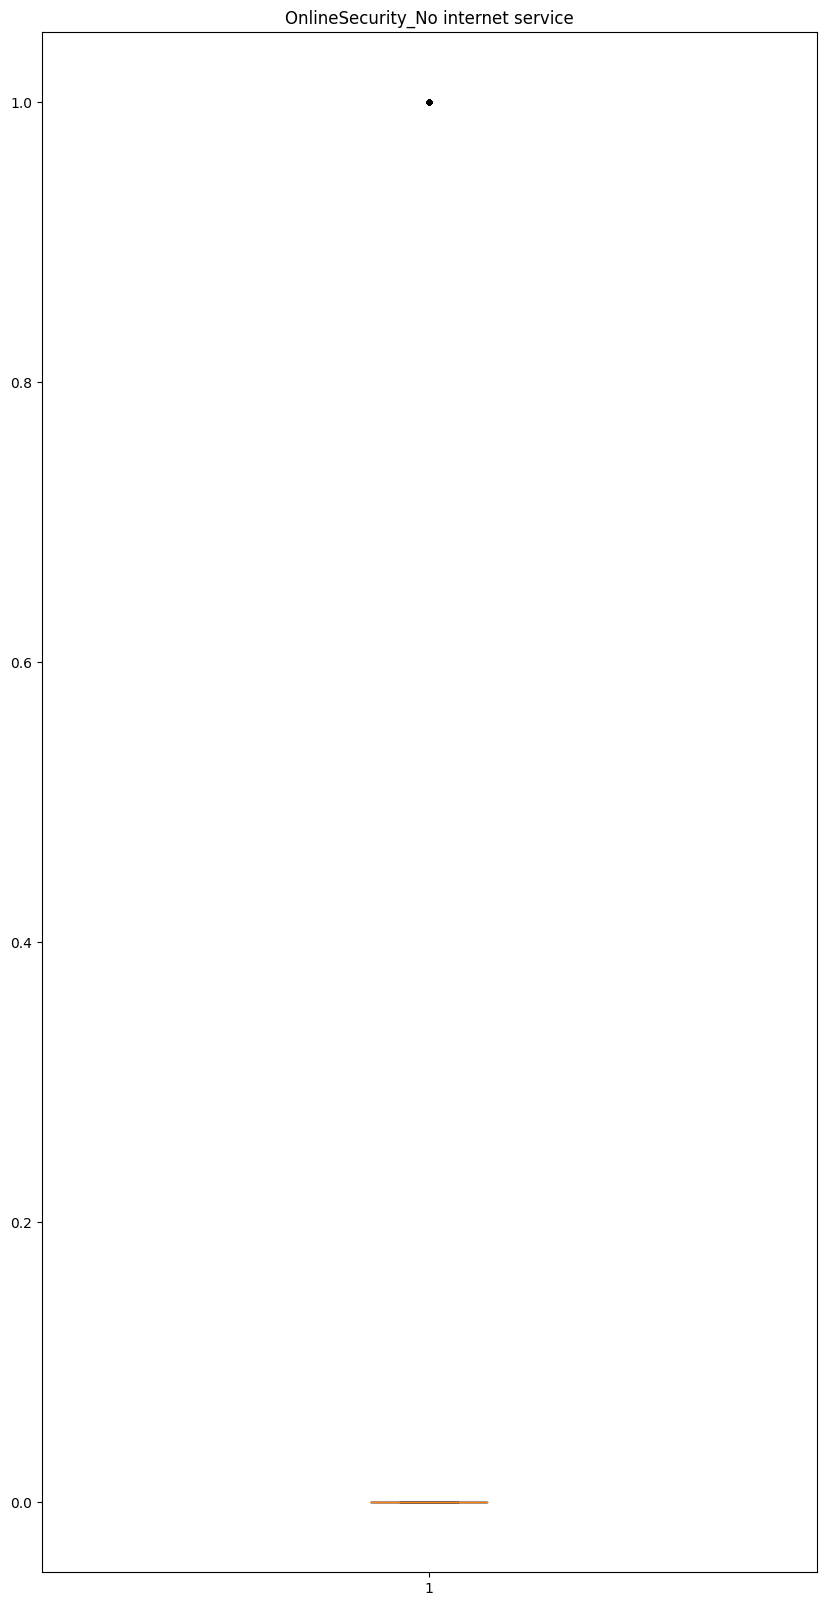

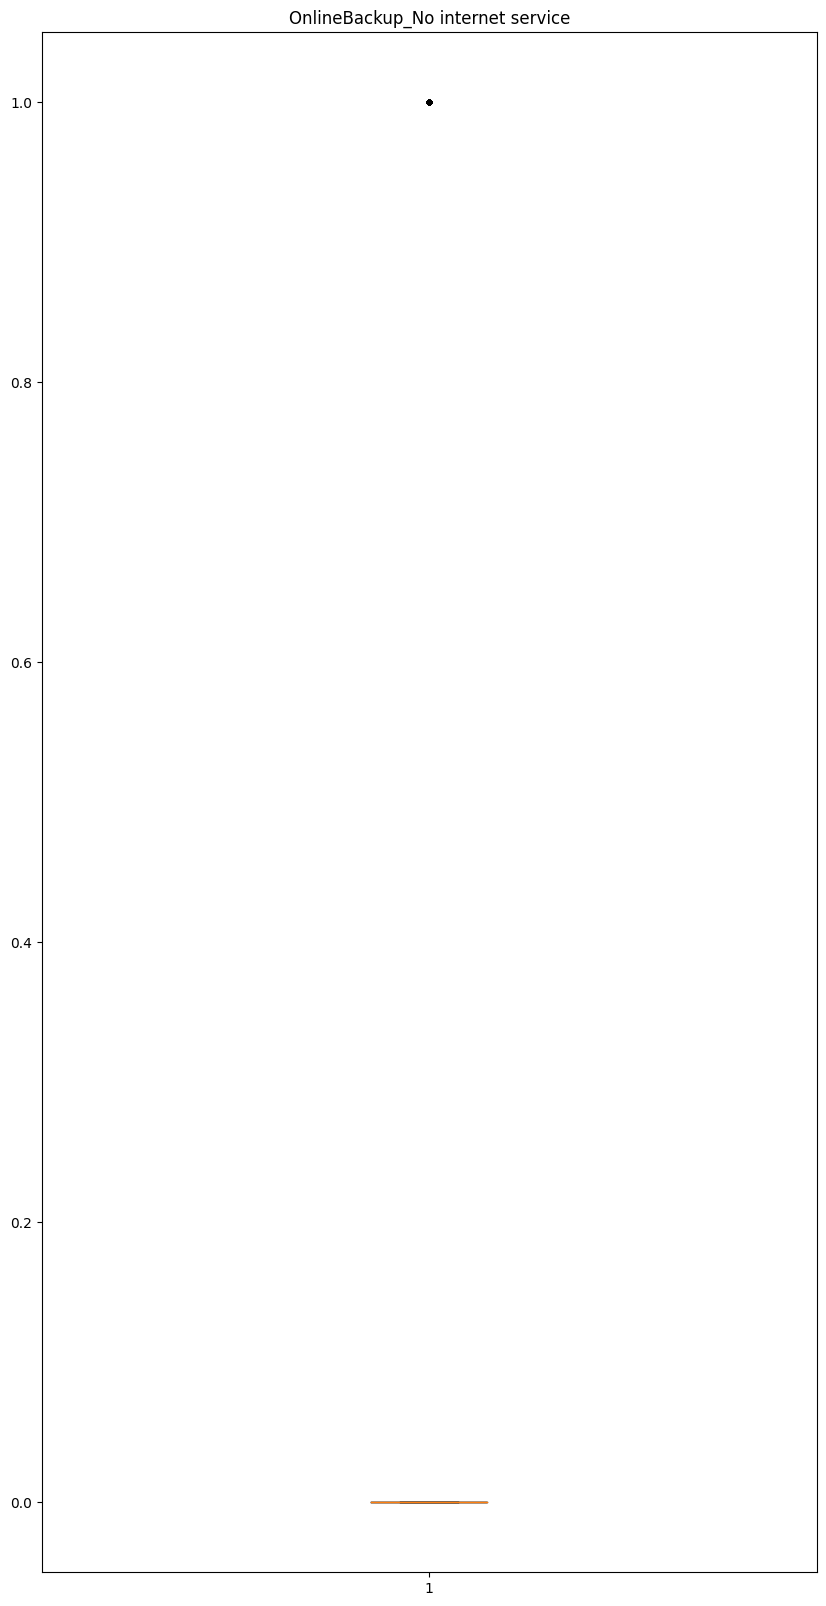

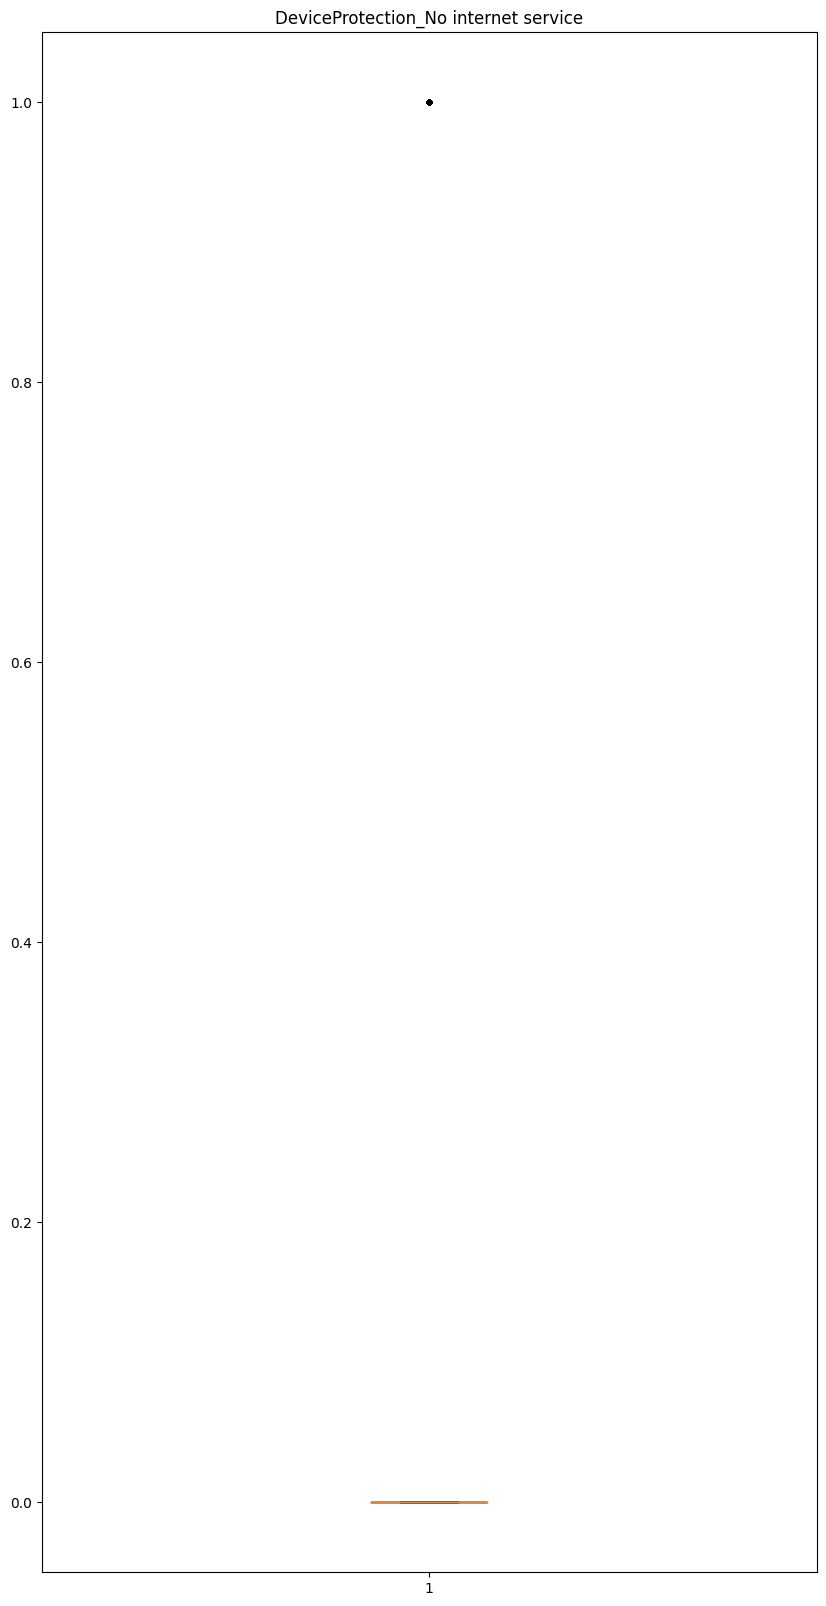

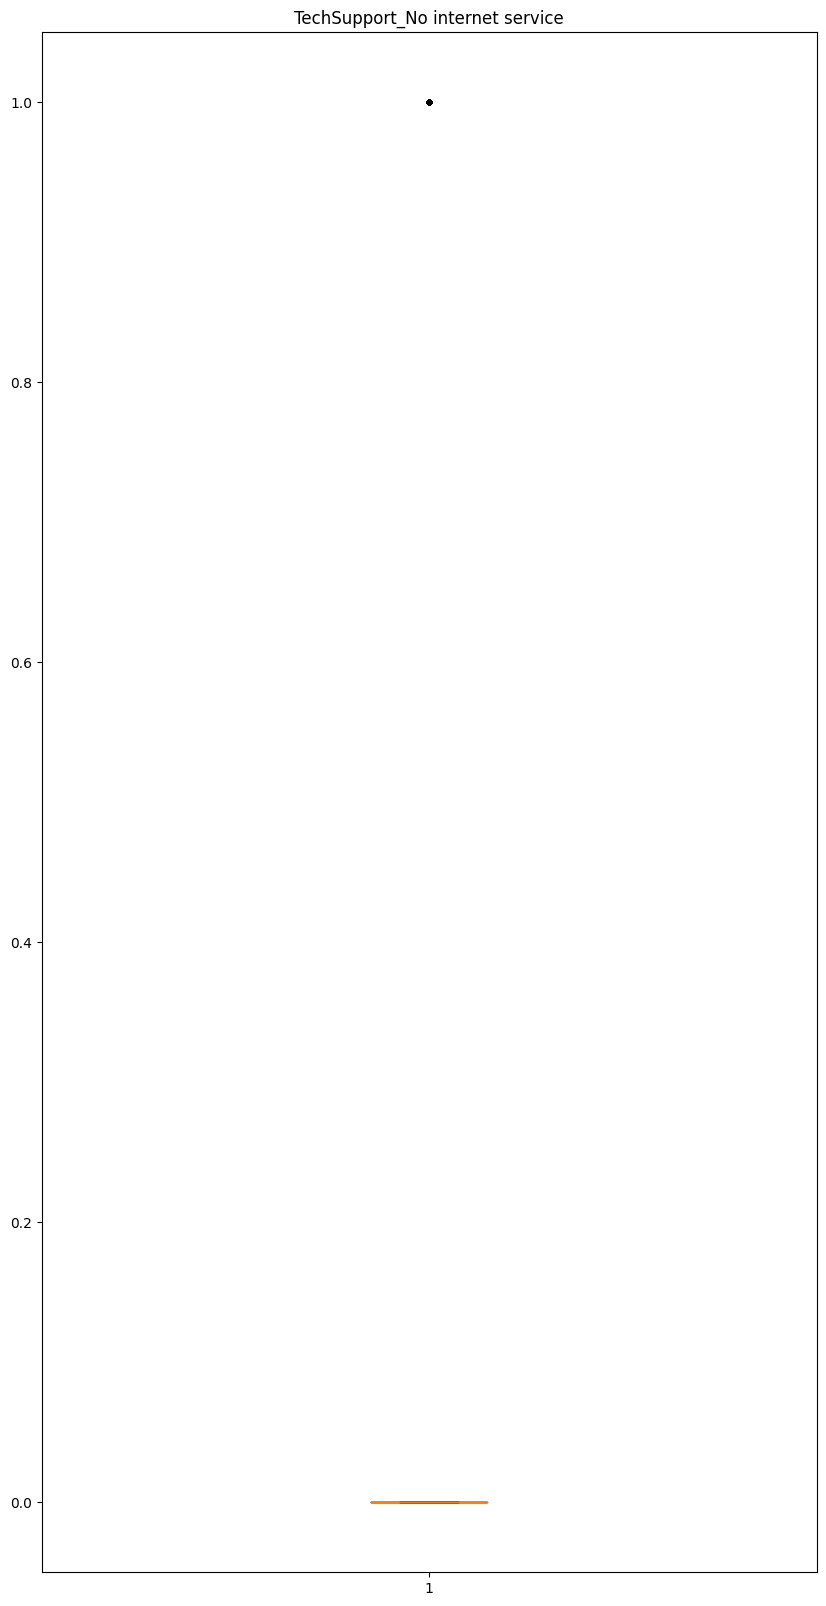

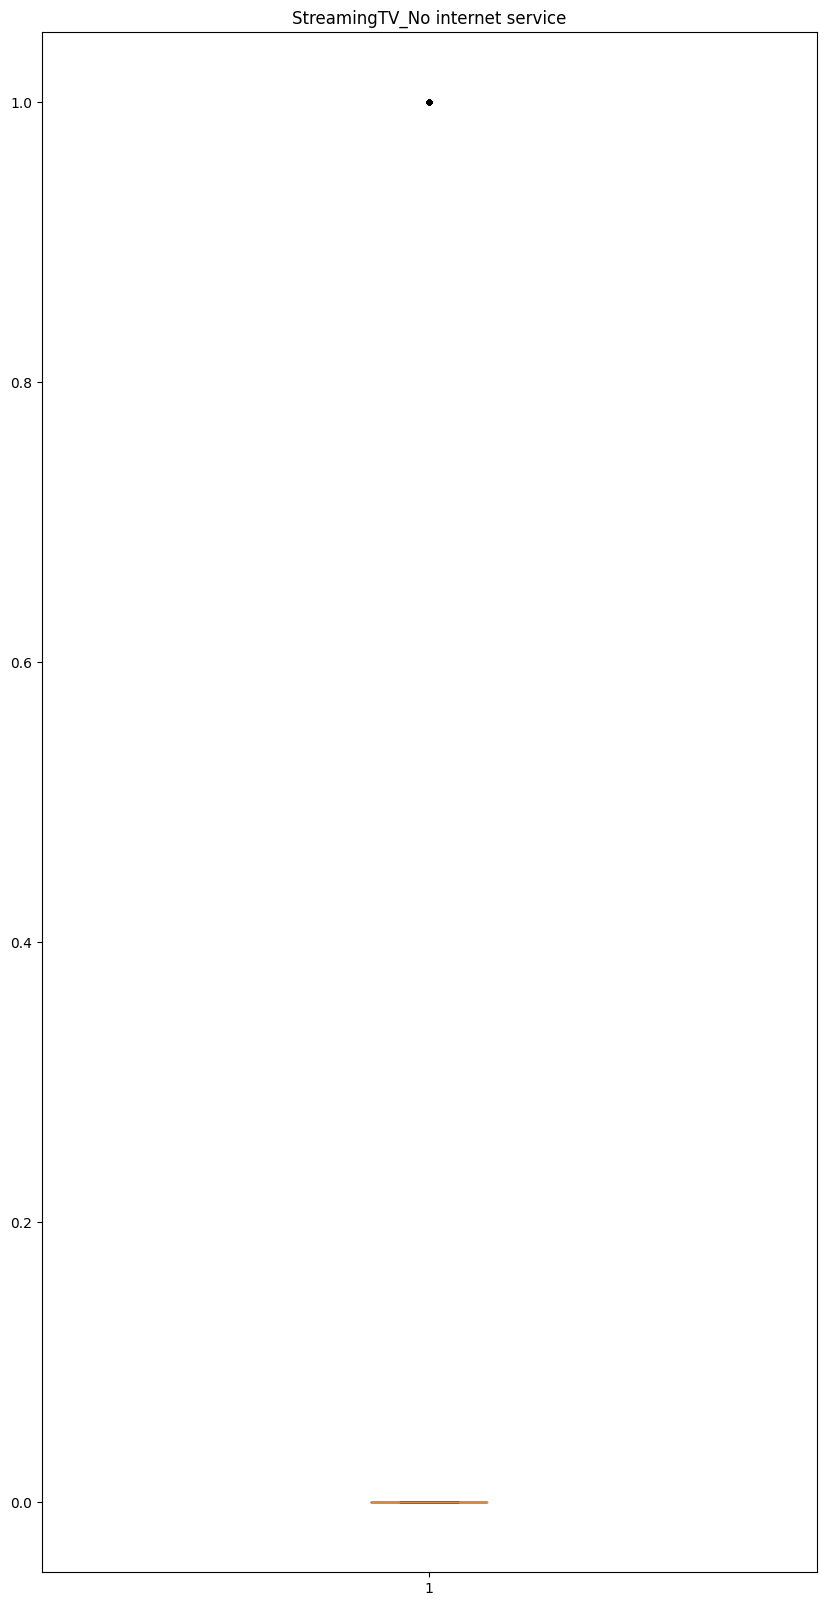

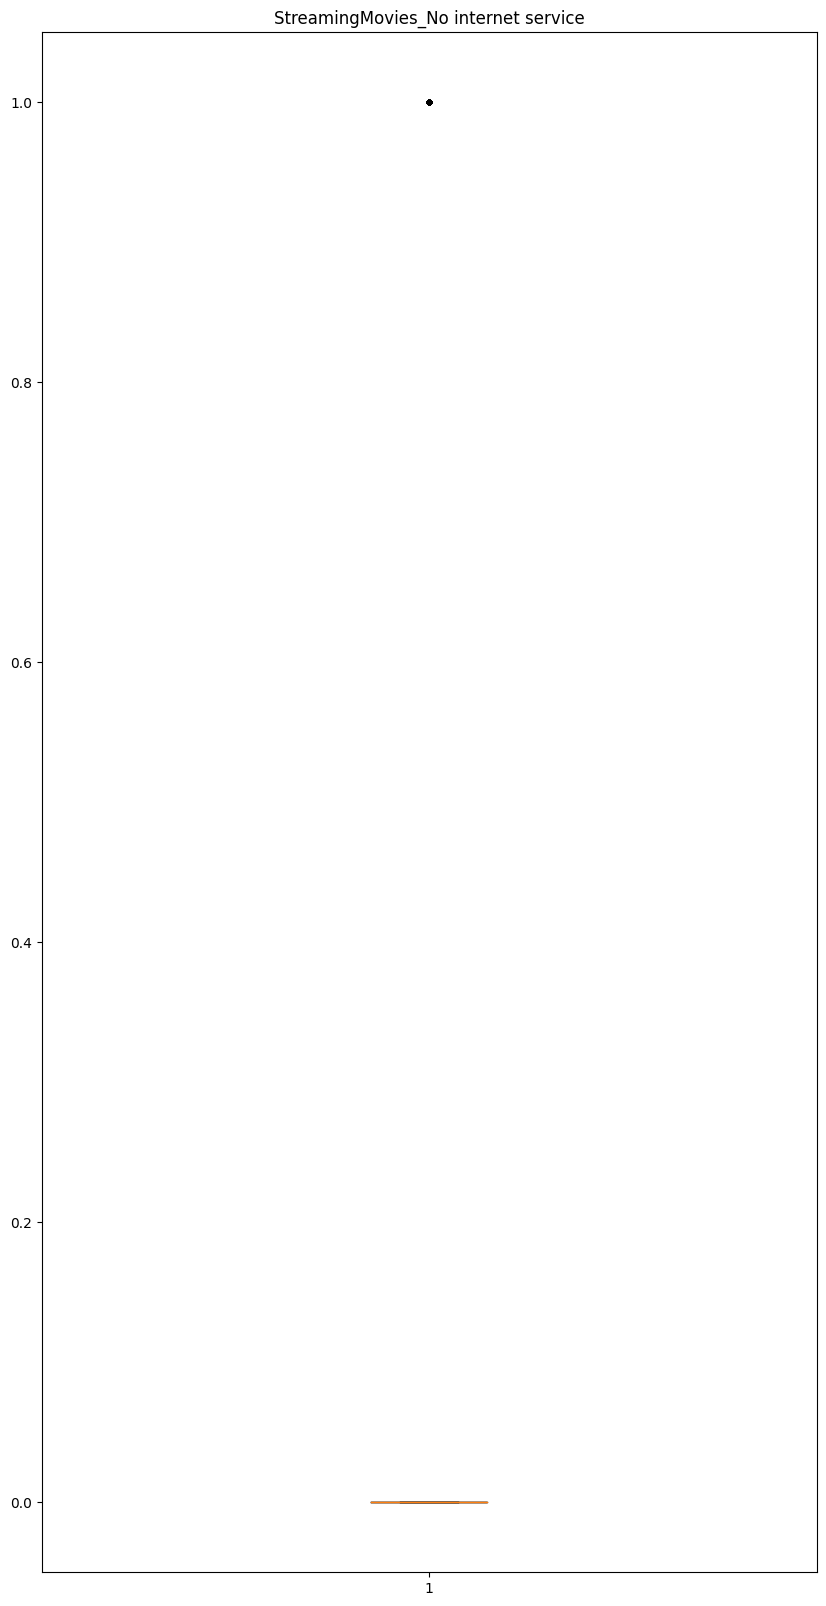

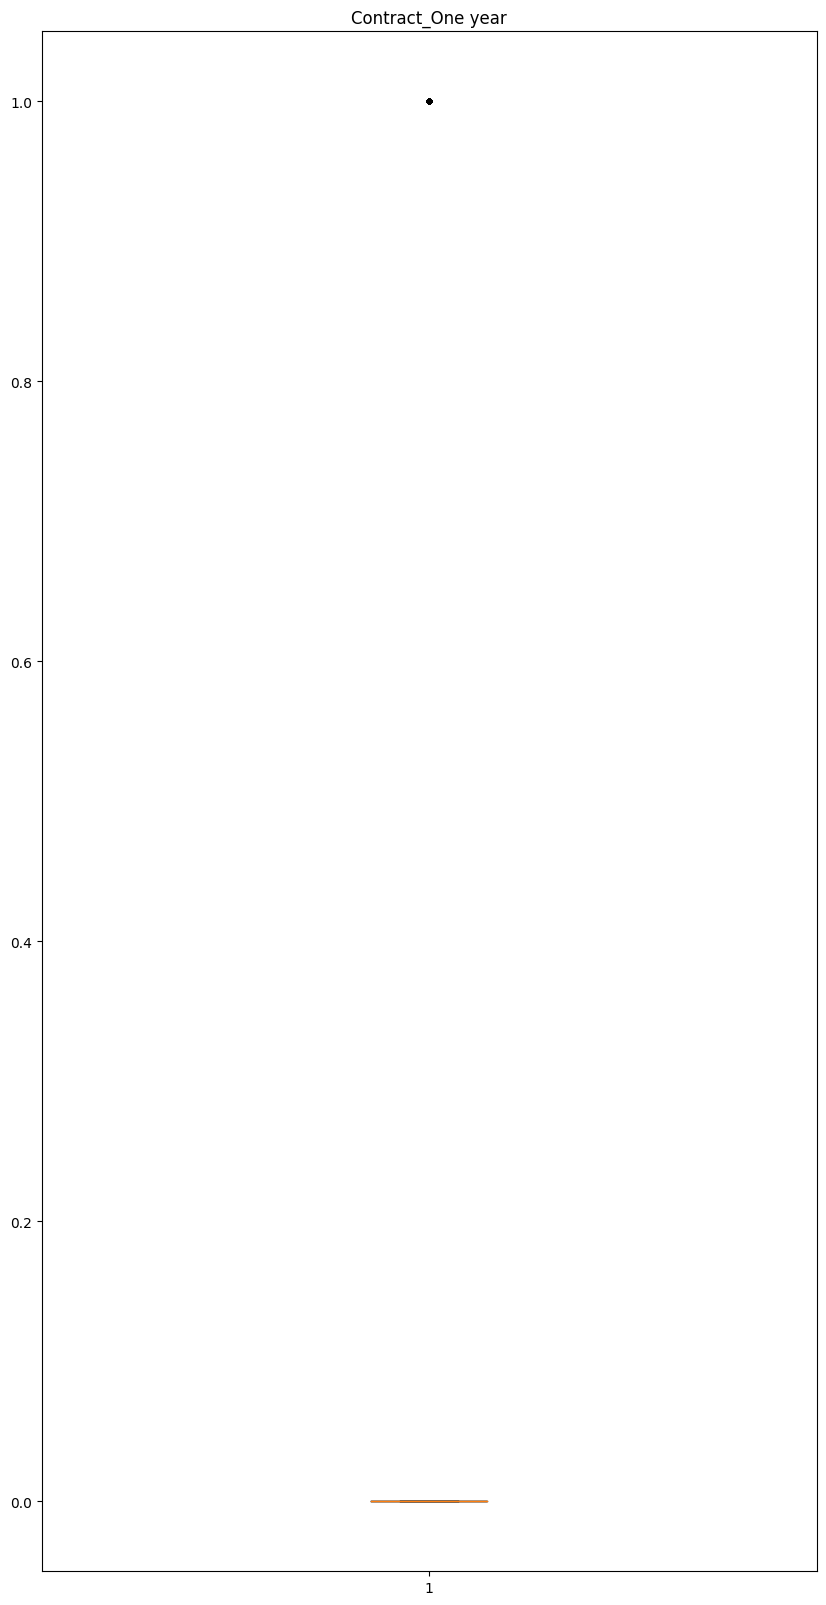

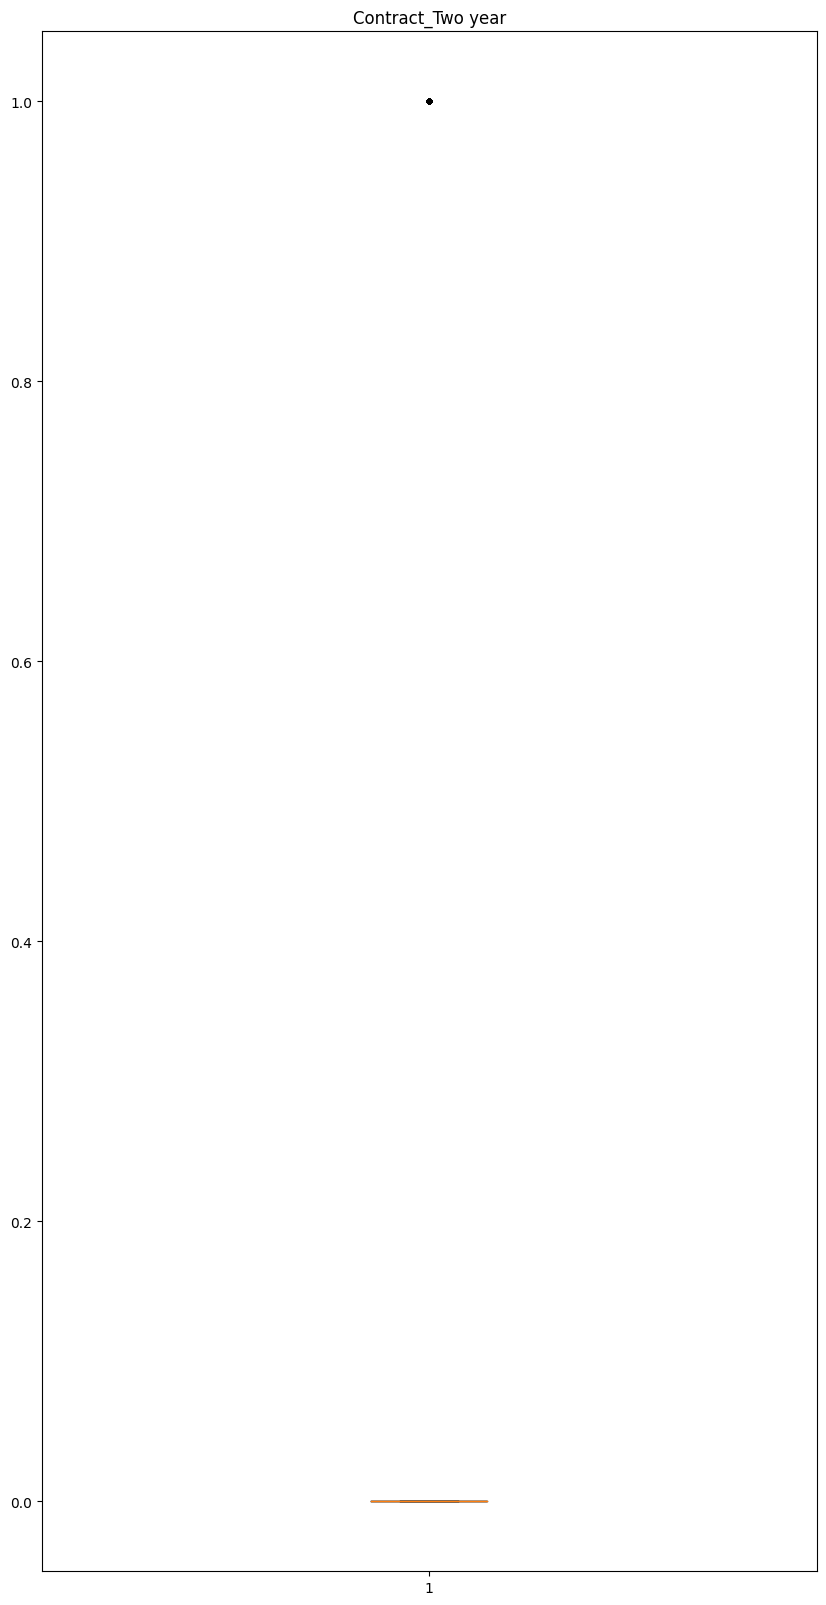

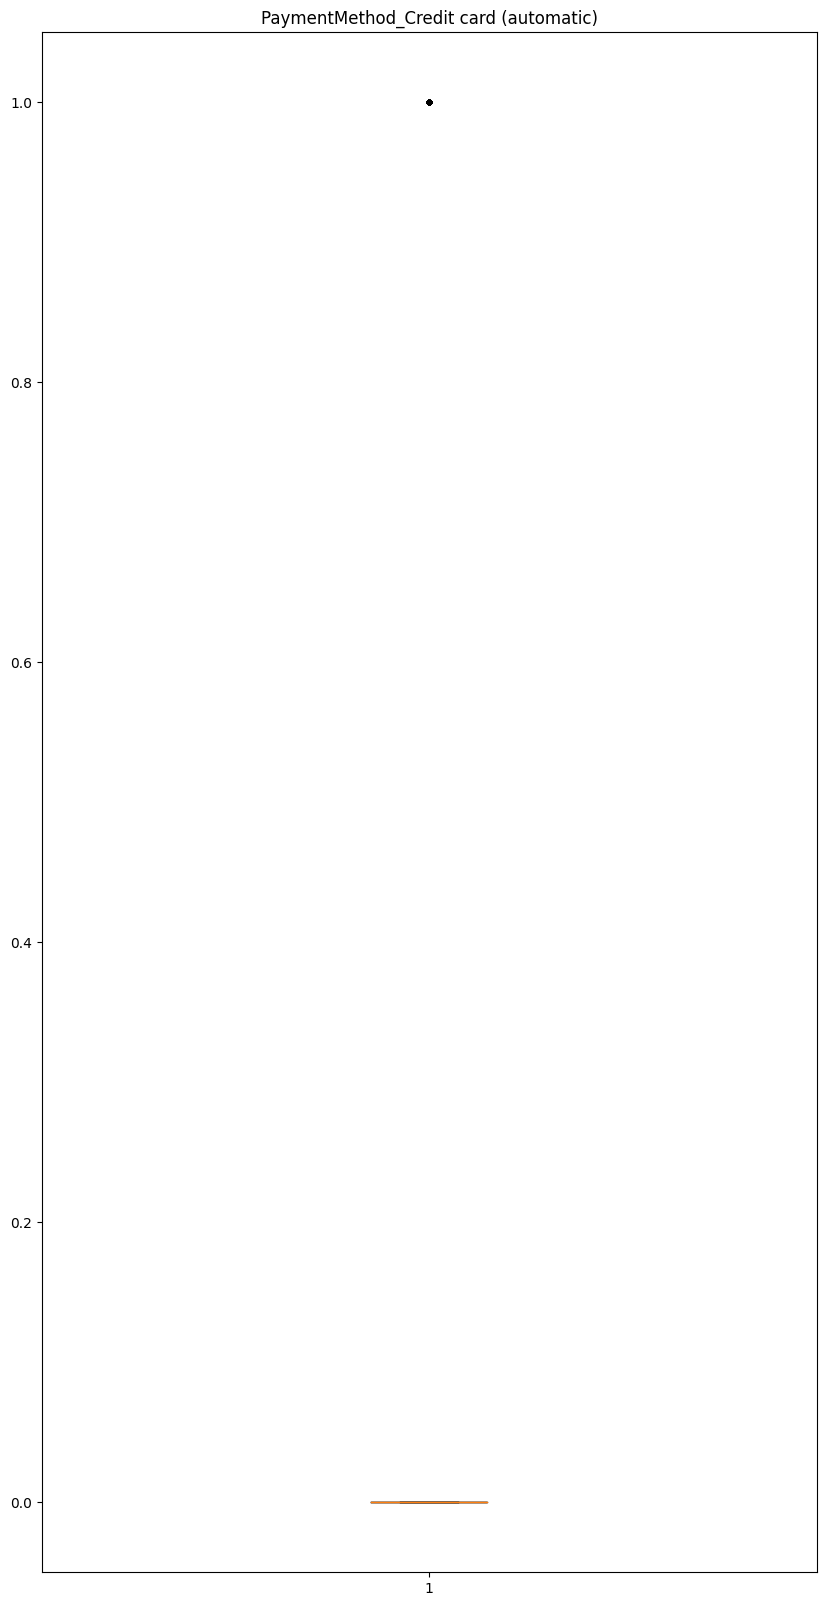

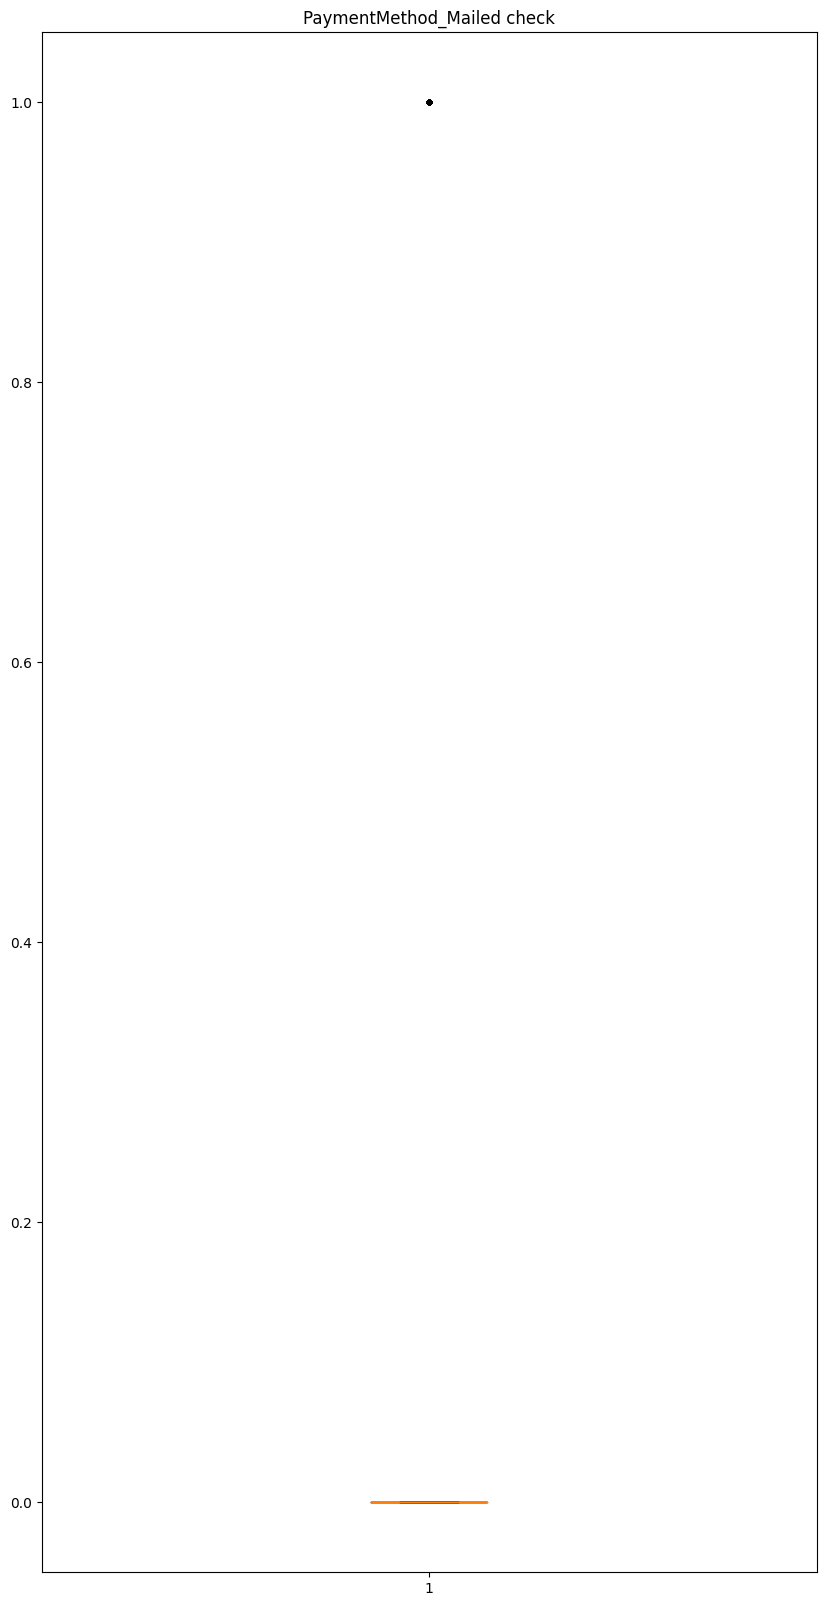

In [ ]:
for col in outlier_cols:
  fig = plt.figure(figsize=(10,20))
  plt.boxplot(dataset[col], sym='k.')
  plt.title(col)



array([[<Axes: title={'center': 'gender_Male'}>,
        <Axes: title={'center': 'SeniorCitizen_1'}>,
        <Axes: title={'center': 'Partner_Yes'}>,
        <Axes: title={'center': 'Dependents_Yes'}>,
        <Axes: title={'center': 'PhoneService_Yes'}>],
       [<Axes: title={'center': 'MultipleLines_No phone service'}>,
        <Axes: title={'center': 'MultipleLines_Yes'}>,
        <Axes: title={'center': 'InternetService_Fiber optic'}>,
        <Axes: title={'center': 'InternetService_No'}>,
        <Axes: title={'center': 'OnlineSecurity_No internet service'}>],
       [<Axes: title={'center': 'OnlineSecurity_Yes'}>,
        <Axes: title={'center': 'OnlineBackup_No internet service'}>,
        <Axes: title={'center': 'OnlineBackup_Yes'}>,
        <Axes: title={'center': 'DeviceProtection_No internet service'}>,
        <Axes: title={'center': 'DeviceProtection_Yes'}>],
       [<Axes: title={'center': 'TechSupport_No internet service'}>,
        <Axes: title={'center': 'TechSuppor

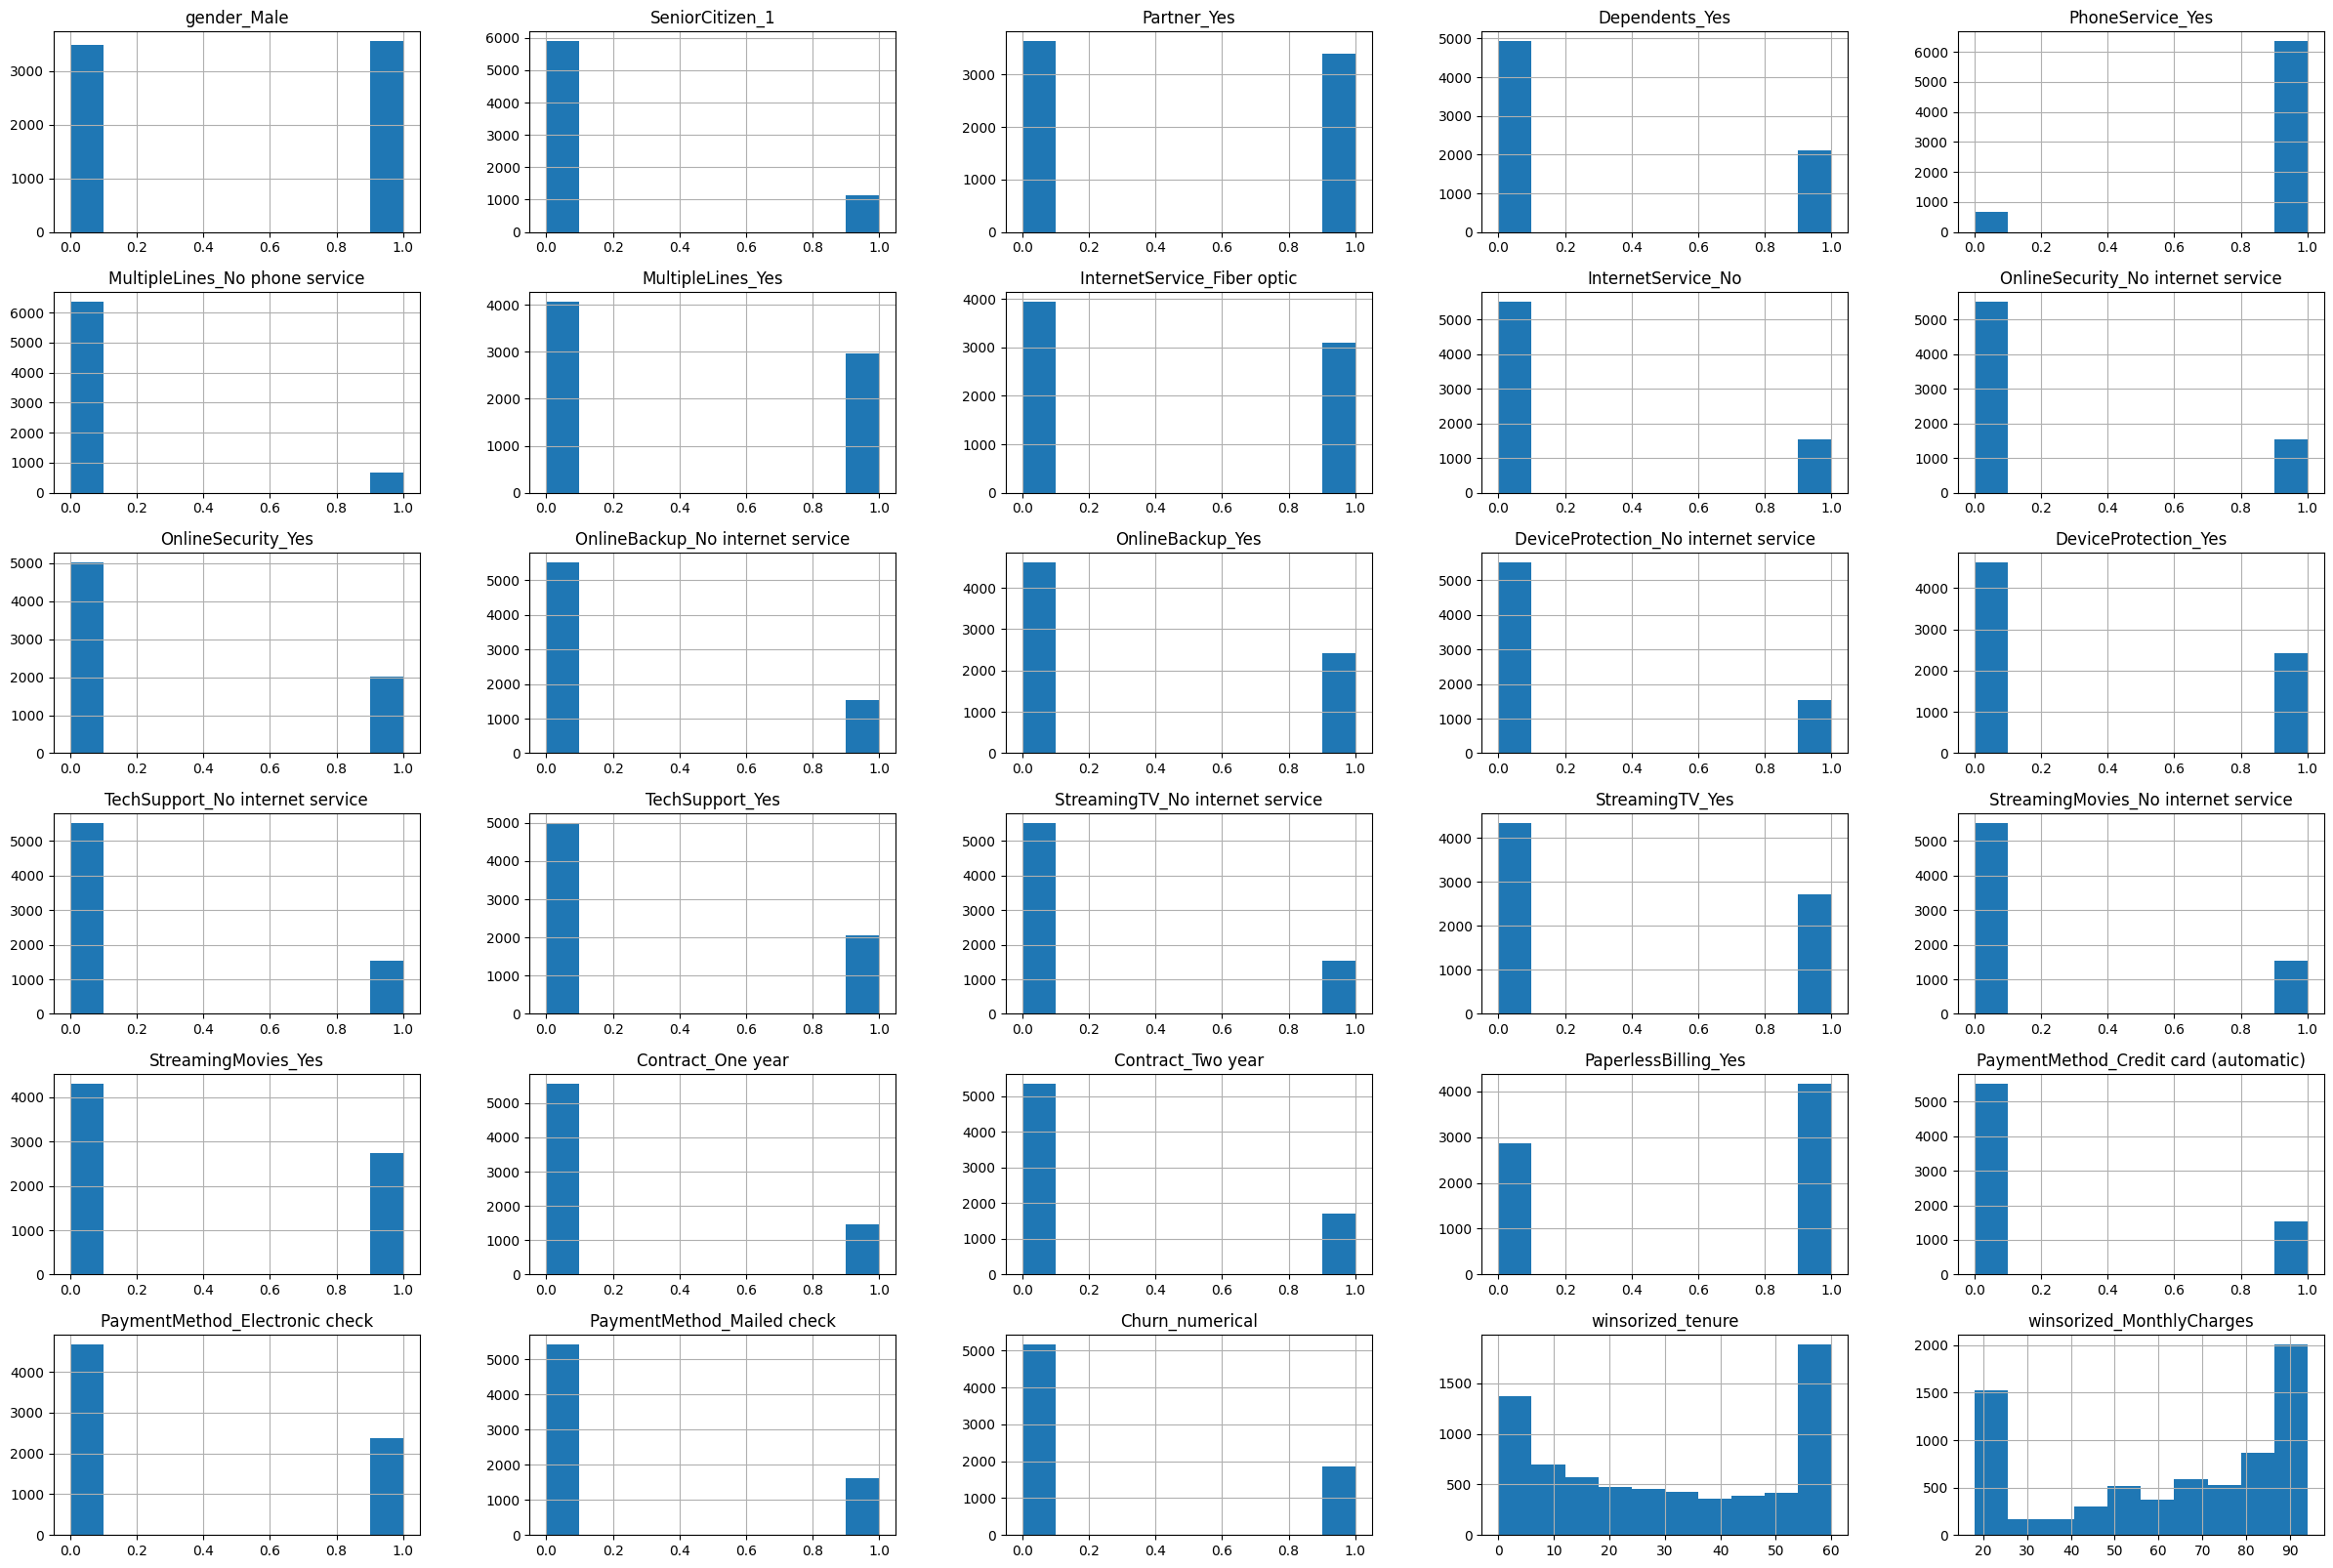

In [ ]:
dataset.hist(figsize=(30,20))


Feature selection

Target Feature
Target Feature - Churn

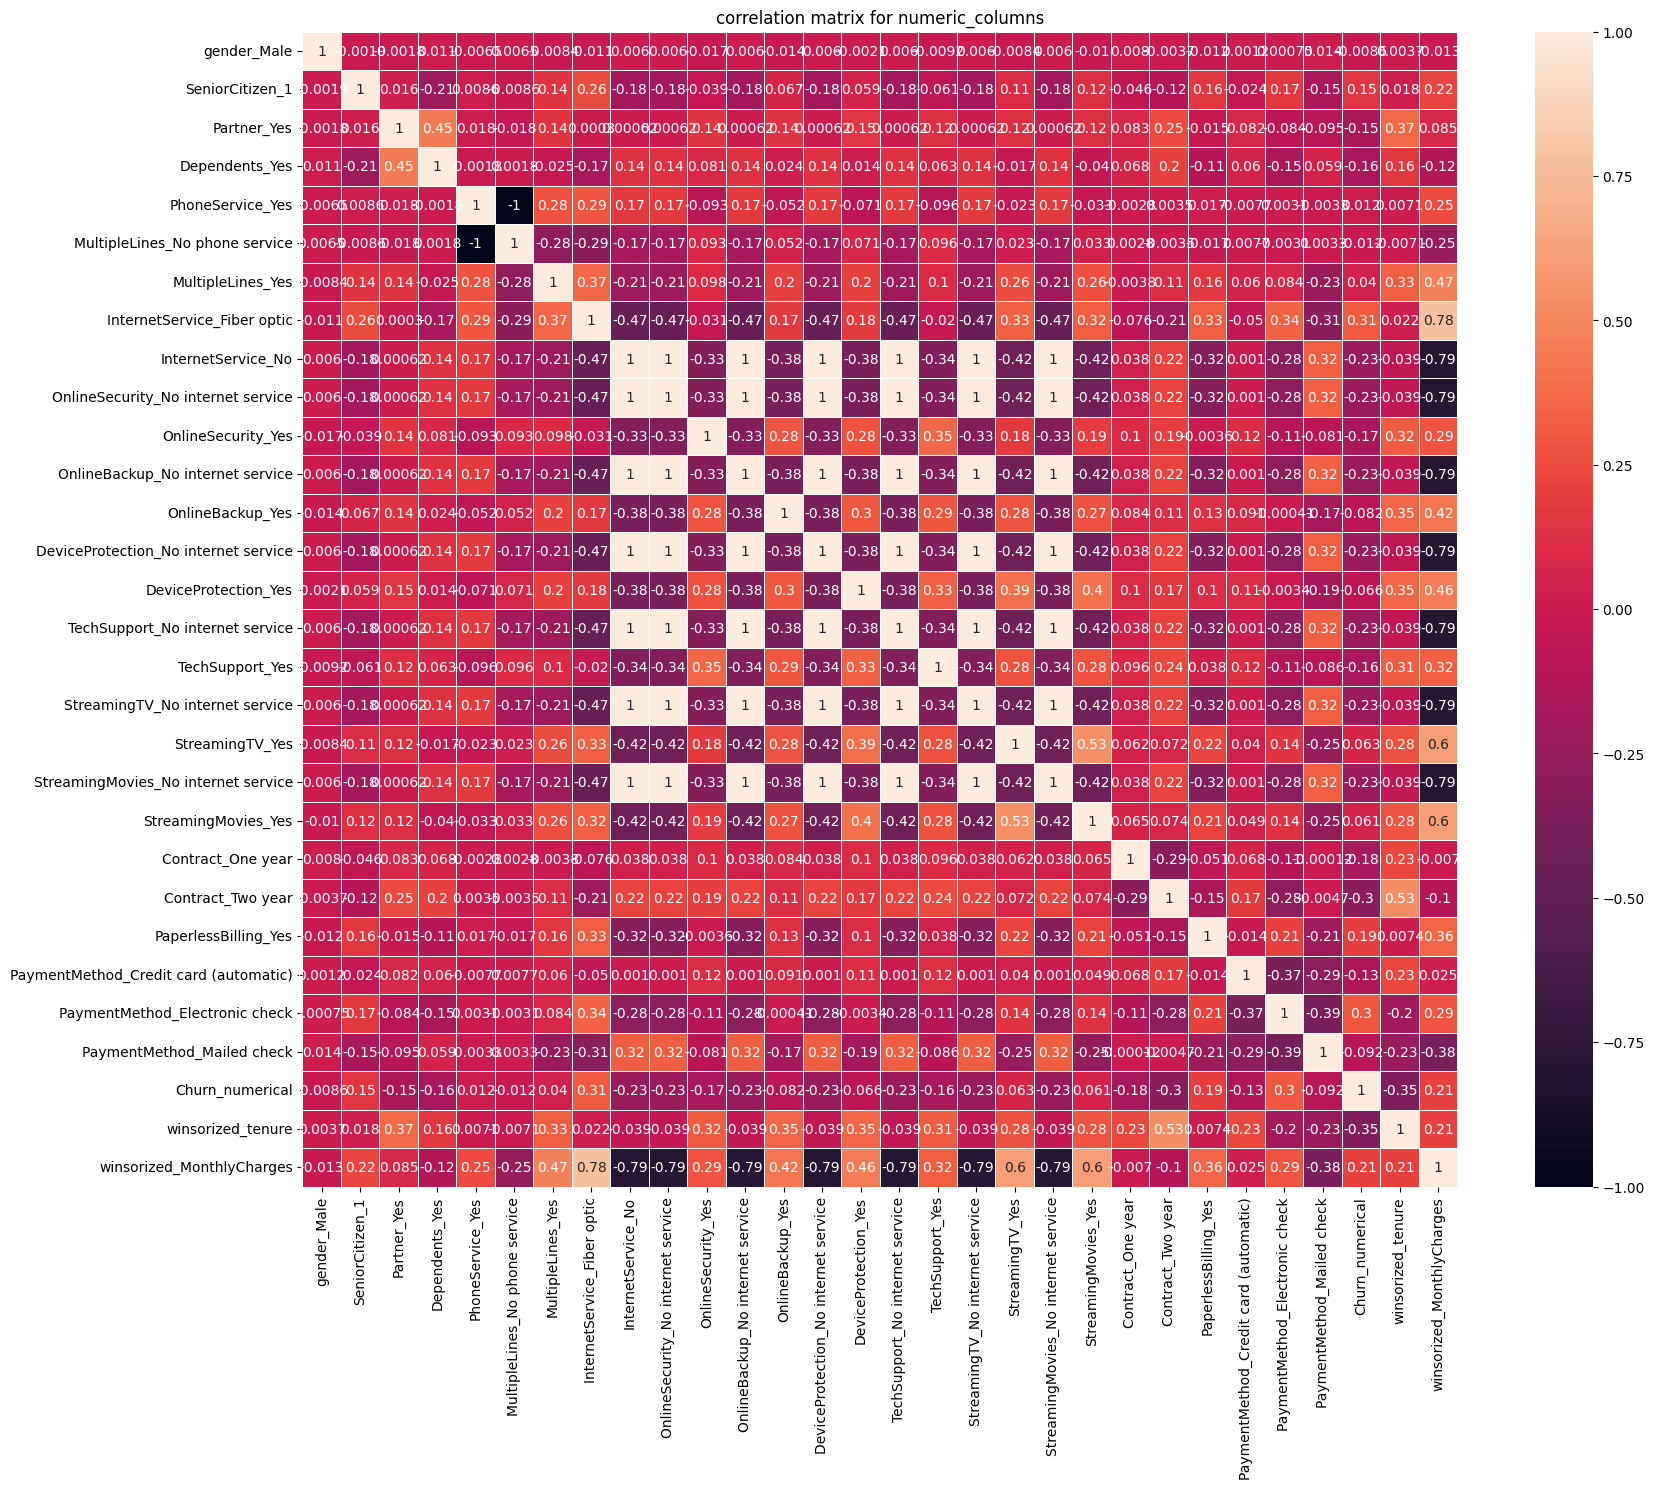

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset[numeric_columns].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for numeric_columns")
plt.show()

In [ ]:
dataset[numeric_columns].corr()


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_numerical,winsorized_tenure,winsorized_MonthlyCharges
gender_Male,1.000000,-0.001874,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,...,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612,0.003718,-0.013447
SeniorCitizen_1,-0.001874,1.000000,0.016479,-0.211185,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,...,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477,0.150889,0.018339,0.222463
Partner_Yes,-0.001808,0.016479,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,...,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448,0.373902,0.085399
Dependents_Yes,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,...,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221,0.157697,-0.119867
PhoneService_Yes,-0.006488,0.008576,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,...,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942,0.007102,0.246622
MultipleLines_No phone service,0.006488,-0.008576,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,...,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942,-0.007102,-0.246622
MultipleLines_Yes,-0.008414,0.142948,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,...,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102,0.326305,0.472020
InternetService_Fiber optic,-0.011286,0.255338,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.465793,...,0.322923,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.308020,0.022047,0.778538
InternetService_No,0.006026,-0.182742,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,...,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.039323,-0.792818
OnlineSecurity_No internet service,0.006026,-0.182742,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,...,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.039323,-0.792818


In [ ]:
dataset.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


gender_Male                              True
SeniorCitizen_1                          True
Partner_Yes                              True
Dependents_Yes                           True
PhoneService_Yes                         True
MultipleLines_No phone service           True
MultipleLines_Yes                        True
InternetService_Fiber optic              True
InternetService_No                       True
OnlineSecurity_No internet service       True
OnlineSecurity_Yes                       True
OnlineBackup_No internet service         True
OnlineBackup_Yes                         True
DeviceProtection_No internet service     True
DeviceProtection_Yes                     True
TechSupport_No internet service          True
TechSupport_Yes                          True
StreamingTV_No internet service          True
StreamingTV_Yes                          True
StreamingMovies_No internet service      True
StreamingMovies_Yes                      True
Contract_One year                 

In [ ]:
PCA

sklearn.decomposition._pca.PCA

In [ ]:
# Y is the target variable
Y = dataset['Churn_numerical']
# X is the feature set
X = dataset.drop(['Churn_numerical'], axis=1)

In [ ]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.54480692,
        -1.33695532, -1.18605367],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.83551265,
         0.14600617, -0.21352884],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.83551265,
        -1.2920171 , -0.32158715],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -0.54480692,
        -0.88757305, -1.18605367],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.83551265,
        -1.20214064,  0.39880162],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.54480692,
         1.31440007,  1.11919038]])

<ipython-input-29-739404fb001f>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,35,1)


Text(0, 0.5, 'Cumulative explained variance')

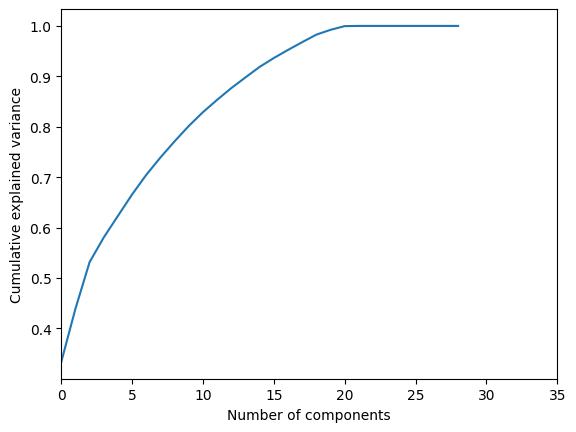

In [ ]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,35,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 13 components. Therfore we can drop rest components.


In [ ]:
pca = PCA(n_components=20)
X_PCA = pca.fit_transform(X_std)
pca_var = pca.explained_variance_ratio_
print('Explained variance ratio: ', pca.explained_variance_ratio_.sum())


Explained variance ratio:  0.9922568887367813


In [ ]:
X_PCA = pd.DataFrame(X_PCA)
X_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.728486,-2.290987,4.000113,2.151870,-1.127519,0.049860,0.774287,1.187425,0.288902,0.366530,-1.452030,-1.044012,0.734065,0.127387,-0.220288,-0.336184,0.251247,-1.425253,-0.185532,-0.204126
1,-0.287828,-0.490350,1.336211,-2.900616,0.981845,1.309459,-0.971326,-1.025674,0.754801,0.753747,0.746041,0.225891,-0.894044,-1.564287,-1.111665,-0.437821,-0.242598,0.487855,0.621136,-0.508318
2,-0.425533,-1.647449,1.105045,-2.588622,0.277788,-0.710153,-0.391126,-0.912255,0.935133,-0.238867,-1.761986,0.030721,0.675409,-1.428090,0.587486,0.333266,0.147726,-0.545759,0.484526,-0.154481
3,-0.985528,0.139114,5.077748,0.049535,1.431671,1.463120,-0.567865,-0.921237,0.117202,1.654087,0.353998,0.291834,-1.452056,0.186744,-1.044439,-0.081651,-0.289984,0.601382,-1.144782,0.876932
4,-0.935861,-3.136840,-0.674619,-0.151514,-0.318133,-0.564058,0.603451,1.060825,-0.834805,0.426301,-0.488787,0.316386,0.104711,-0.137914,-0.381018,-0.594214,-0.091376,0.498286,-0.407912,-0.241016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-1.937945,1.873435,0.320314,-1.972771,-0.967994,2.175942,-1.548120,-0.947889,-0.144819,-1.446082,-0.012195,1.187517,-1.684331,0.136507,0.005643,1.262291,0.149536,-0.646574,0.442756,-0.331077
7039,-2.600727,2.485179,-1.273438,0.327874,0.333633,2.393636,1.210650,1.016685,-0.625115,-1.680137,0.026311,-1.513490,0.372310,-0.399150,-0.415020,0.254099,0.014917,0.381115,0.239573,-0.374191
7040,-0.597687,-1.486290,4.386516,1.507169,-2.403307,0.276256,1.409951,1.251235,0.018733,0.462528,-0.866779,0.507964,-1.227299,-0.934521,0.421017,0.582366,0.041592,-0.217510,-0.513207,-0.140209
7041,-0.877115,-2.004002,-1.095238,-0.577986,-0.526511,-0.455831,0.338381,-1.124551,2.931673,-1.927260,0.155697,0.034837,-0.935469,0.545715,-0.143310,-0.294901,0.011542,-0.562254,-0.386931,-0.281775


Baseline Modeling

Split into Training and Testing Sets


In [ ]:
X_PCA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7043 non-null   float64
 1   1       7043 non-null   float64
 2   2       7043 non-null   float64
 3   3       7043 non-null   float64
 4   4       7043 non-null   float64
 5   5       7043 non-null   float64
 6   6       7043 non-null   float64
 7   7       7043 non-null   float64
 8   8       7043 non-null   float64
 9   9       7043 non-null   float64
 10  10      7043 non-null   float64
 11  11      7043 non-null   float64
 12  12      7043 non-null   float64
 13  13      7043 non-null   float64
 14  14      7043 non-null   float64
 15  15      7043 non-null   float64
 16  16      7043 non-null   float64
 17  17      7043 non-null   float64
 18  18      7043 non-null   float64
 19  19      7043 non-null   float64
dtypes: float64(20)
memory usage: 1.1 MB


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 5634
The number of observations in test set is 1409


In [ ]:
def print_result(model, X_test, y_test):

    y_pred = model.predict(X_test) #prediction
    train_score = model.score(X_train,y_train)

    accuracy = metrics.accuracy_score(y_test, y_pred)


    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    conf_mat_df = pd.DataFrame(conf_mat,
                               index= ['true_no', 'true_yes'],
                              columns = ['predict_no', 'predict_yes'])
    print('train_score:%.3f'%train_score)

    print('accuracy:%.3f'%accuracy)
    print('Confusion Matrix:', end='\n')
    print(conf_mat_df, end='\n\n')
    print(classification_report(y_test, y_pred))





*   We are going to fit our model on the training data.
*   Then we are going to test our model by having it predict y values for our X_test data.
*   We can then evaluate how well our model performed by seeing how far off the predicted y values were from the actual y values.







1. Logistic Regression Classifier


In [ ]:
lr_params = {
    'max_iter': 1000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': .6
}
lr = LogisticRegression(**lr_params)
lr.fit(X_train, y_train)
print_result(lr, X_test, y_test)


train_score:0.751
accuracy:0.762
Confusion Matrix:
          predict_no  predict_yes
true_no          771          250
true_yes          86          302

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1021
           1       0.55      0.78      0.64       388

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': [ 'l2', None]}

CV_rfc = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

lr_params = {
    'max_iter': 1000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': 0.01
}
lr = LogisticRegression(**lr_params)
lr.fit(X_train, y_train)
print_result(lr, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

{'C': 0.1, 'penalty': 'l2'}
train_score:0.750
accuracy:0.759
Confusion Matrix:
          predict_no  predict_yes
true_no          769          252
true_yes          88          300

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1021
           1       0.54      0.77      0.64       388

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


2. KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)


train_score:0.838
accuracy:0.748
Confusion Matrix:
          predict_no  predict_yes
true_no          868          153
true_yes         202          186

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1021
           1       0.55      0.48      0.51       388

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.75      0.74      1409



In [ ]:
param_grid = {'n_neighbors':[3, 5, 7, 9, 15],
                'weights':['uniform', 'distance'],

               }

CV_rfc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'uniform')
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)
score = cross_val_score(knn, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())

train_score:0.819
accuracy:0.759
Confusion Matrix:
          predict_no  predict_yes
true_no          884          137
true_yes         202          186

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1021
           1       0.58      0.48      0.52       388

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

Cross validation Score is  0.7651726440169809


3. Decision Tree


In [ ]:
# timing
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=20,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X_train, y_train, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(decision_tree, X_test, y_test)

Cross validation Score is  0.7174265900759609
--- 0.22776532173156738 seconds ---
train_score:0.961
accuracy:0.732
Confusion Matrix:
          predict_no  predict_yes
true_no          863          158
true_yes         219          169

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1021
           1       0.52      0.44      0.47       388

    accuracy                           0.73      1409
   macro avg       0.66      0.64      0.65      1409
weighted avg       0.72      0.73      0.72      1409



In [ ]:
param_grid = {'max_depth':[3, 5, 7, 9, 15, 20]}

CV_rfc = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 5}


In [ ]:
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X_train, y_train, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(decision_tree, X_test, y_test)

Cross validation Score is  0.7451116737840596
--- 0.11863255500793457 seconds ---
train_score:0.749
accuracy:0.732
Confusion Matrix:
          predict_no  predict_yes
true_no          935           86
true_yes         292           96

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1021
           1       0.53      0.25      0.34       388

    accuracy                           0.73      1409
   macro avg       0.64      0.58      0.58      1409
weighted avg       0.70      0.73      0.70      1409



4. Random Forest


In [ ]:
# timing
start_time = time.time()


rfc = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the classifier
rfc.fit(X_train,y_train)

score = cross_val_score(rfc, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(rfc, X_test, y_test)

Cross validation Score is  0.7767122683698021
--- 229.668794631958 seconds ---
train_score:0.986
accuracy:0.769
Confusion Matrix:
          predict_no  predict_yes
true_no          929           92
true_yes         234          154

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1021
           1       0.63      0.40      0.49       388

    accuracy                           0.77      1409
   macro avg       0.71      0.65      0.67      1409
weighted avg       0.75      0.77      0.75      1409



In [ ]:
param_grid = {'bootstrap': [True],
    'max_depth': [3, 5, 7, 15, 20],
    'max_features': [2, 3],
    }

CV_rfc = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'bootstrap': True, 'max_depth': 7, 'max_features': 3}


In [ ]:
# timing
start_time = time.time()


rfc = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1, bootstrap = True,
    max_depth = 20, max_features = 2)

# Train the classifier
rfc.fit(X_train,y_train)

score = cross_val_score(rfc, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(rfc, X_test, y_test)

Cross validation Score is  0.7784881523751938
--- 129.41043400764465 seconds ---
train_score:0.986
accuracy:0.774
Confusion Matrix:
          predict_no  predict_yes
true_no          936           85
true_yes         234          154

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1021
           1       0.64      0.40      0.49       388

    accuracy                           0.77      1409
   macro avg       0.72      0.66      0.67      1409
weighted avg       0.76      0.77      0.75      1409




The score cross validation reports is the accuracy of the tree. Here we're about 78% accurate. Accuracy is how close a measured value is to the actual (true) value

5. Gradient Boosting


In [ ]:
params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


train_score:0.816
accuracy:0.797
Confusion Matrix:
          predict_no  predict_yes
true_no          945           76
true_yes         210          178

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1021
           1       0.70      0.46      0.55       388

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



In [ ]:
param_grid = {'n_estimators':[40, 60, 80, 100],
                'learning_rate':[0.001, 0.05, 0.1, 0.2],
               'max_depth':[2, 3, 4, 6, 8],
               }

CV_rfc = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [ ]:
params = {'n_estimators': 100,
          'max_depth': 3,
          'learning_rate': 0.1,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


train_score:0.838
accuracy:0.790
Confusion Matrix:
          predict_no  predict_yes
true_no          933           88
true_yes         208          180

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1021
           1       0.67      0.46      0.55       388

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



6. Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb_n = BernoulliNB()
# Fit our model to the data.
bnb_n.fit(X_train, y_train)
print_result(bnb_n, X_test, y_test)

train_score:0.773
accuracy:0.769
Confusion Matrix:
          predict_no  predict_yes
true_no          909          112
true_yes         214          174

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1021
           1       0.61      0.45      0.52       388

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print_result(gnb, X_test, y_test)

train_score:0.767
accuracy:0.779
Confusion Matrix:
          predict_no  predict_yes
true_no          829          192
true_yes         119          269

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1021
           1       0.58      0.69      0.63       388

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.79      0.78      0.78      1409



Logistic Regression Classifier, KNN, Decision Tree, Random Forest, Gradient Boosting, XG Boosting



In [ ]:
print('Logistic Regression Classifier\n')
print_result(lr, X_test, y_test)
print('KNN\n')
print_result(knn, X_test, y_test)
print('Decision Tree\n')
print_result(decision_tree, X_test, y_test)
print('Random Forest\n')
print_result(rfc, X_test, y_test)
print('Gradient Boosting\n')
print_result(clf, X_test, y_test)
print('GaussianNB\n')
print_result(gnb, X_test, y_test)

Logistic Regression Classifier

train_score:0.750
accuracy:0.759
Confusion Matrix:
          predict_no  predict_yes
true_no          769          252
true_yes          88          300

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1021
           1       0.54      0.77      0.64       388

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

KNN

train_score:0.819
accuracy:0.759
Confusion Matrix:
          predict_no  predict_yes
true_no          884          137
true_yes         202          186

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1021
           1       0.58      0.48      0.52       388

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

D

Conclustions:

**The Gradient Boosting model** had the best overall performance with 0.790 accuracy on the test set. This indicates it was best able to generalize and make accurate predictions on new unseen data. The precision and recall scores are reasonably balanced as well. This would likely be the best model to deploy.

**The Random Forest model** had strong performance on the training set (0.986 score) indicating high variance/overfitting. The poorer test set accuracy (0.774) reflects this overfitting. Using regularization techniques like reducing the number of estimators could improve generalizability.

The **Logistic Regression and Gaussian NB models** had more balanced performance between train and test sets, indicating less overfitting. Their simpler nature limits overall accuracy compared to ensemble methods like Random Forest and Gradient Boosting. But they could be considered as baselines.
The Decision Tree model had notably lower test accuracy than training (0.749 train vs 0.732 test). This implies high variance and overfitting, which is common for standalone decision trees. Ensemble methods like Random Forest improve on this.
